In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("student_mat.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [ ]:
df["school"].value_counts()

GP    349
MS     46
Name: school, dtype: int64

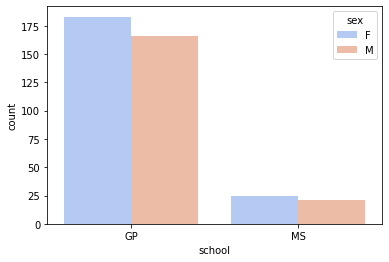

In [ ]:
sns.countplot(df["school"], palette="coolwarm", hue="sex", data=df)

In [ ]:
df["address"].value_counts()

U    307
R     88
Name: address, dtype: int64

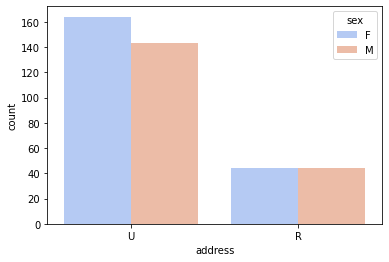

In [ ]:
sns.countplot(df["address"], palette="coolwarm", hue="sex", data=df)

In [ ]:
df["famsize"].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

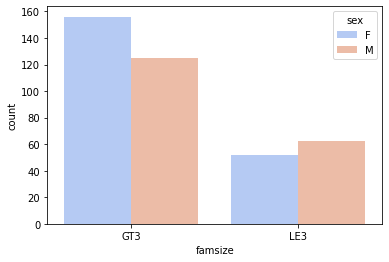

In [ ]:
sns.countplot(df["famsize"], palette="coolwarm", hue="sex", data=df)

In [ ]:
df["Pstatus"].value_counts()

T    354
A     41
Name: Pstatus, dtype: int64

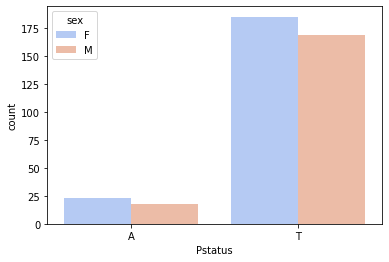

In [ ]:
sns.countplot(df["Pstatus"], palette="coolwarm", hue="sex", data=df)

In [ ]:
df["Mjob"].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

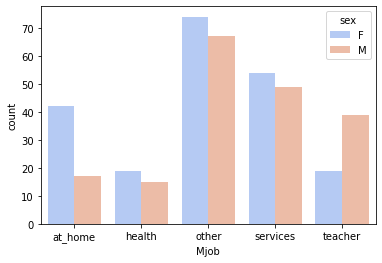

In [ ]:
sns.countplot(df["Mjob"], palette="coolwarm", hue="sex", data=df)

In [ ]:
df["Fjob"].value_counts()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

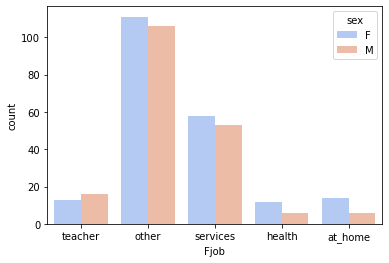

In [ ]:
sns.countplot(df["Fjob"], palette="coolwarm", hue="sex", data=df)

In [ ]:
df["reason"].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

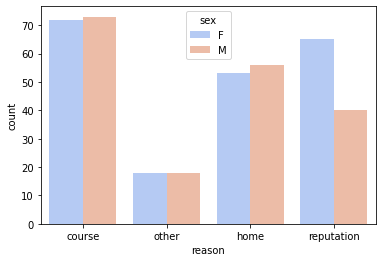

In [ ]:
sns.countplot(df["reason"], palette="coolwarm", hue="sex", data=df)

In [ ]:
df["guardian"].value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

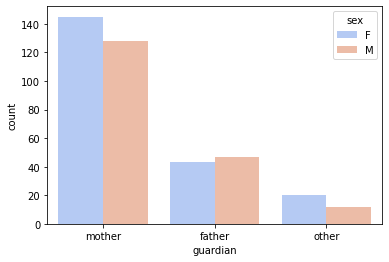

In [ ]:
sns.countplot(df["guardian"], palette="coolwarm", hue="sex", data=df)

In [ ]:
df["schoolsup"].value_counts()

no     344
yes     51
Name: schoolsup, dtype: int64

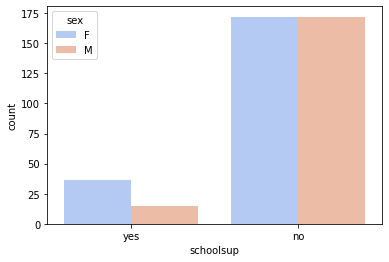

In [ ]:
sns.countplot(df["schoolsup"], palette="coolwarm", hue="sex", data=df)

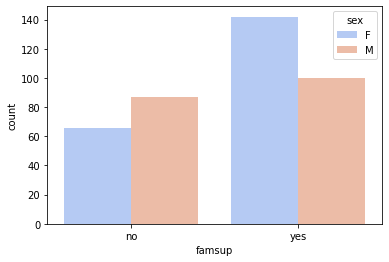

In [ ]:
sns.countplot(df["famsup"], palette="coolwarm", hue="sex", data=df)

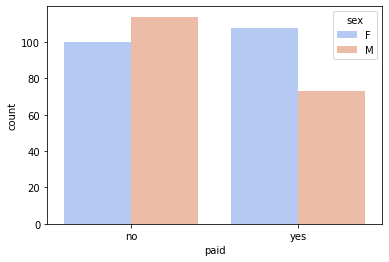

In [ ]:
sns.countplot(df["paid"], palette="coolwarm", hue="sex", data=df)

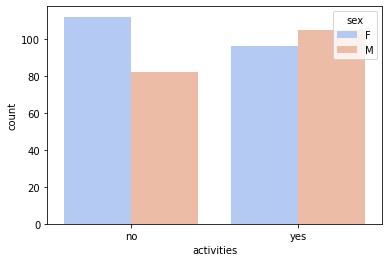

In [ ]:
sns.countplot(df["activities"], palette="coolwarm", hue="sex", data=df)

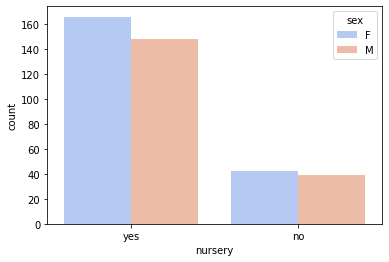

In [ ]:
sns.countplot(df["nursery"], palette="coolwarm", hue="sex", data=df)


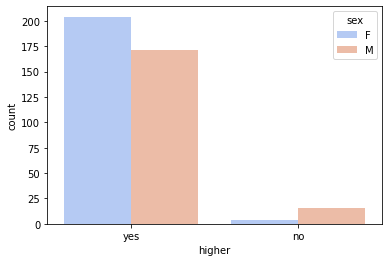

In [ ]:
sns.countplot(df["higher"], palette="coolwarm", hue="sex", data=df)

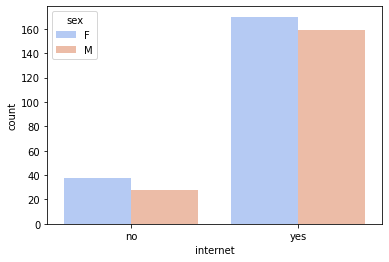

In [ ]:
sns.countplot(df["internet"], palette="coolwarm", hue="sex", data=df)

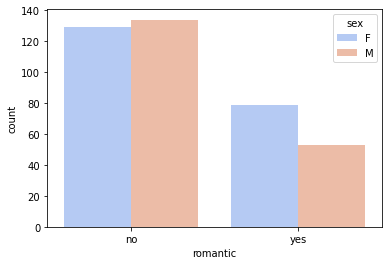

In [ ]:
sns.countplot(df["romantic"], palette="coolwarm", hue="sex", data=df)

In [3]:
X = df.drop(['G1', 'G2', 'G3'], axis=1)

In [4]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0


In [5]:
y = df["G1"]

In [6]:
y

0       5
1       5
2       7
3      15
4       6
       ..
390     9
391    14
392    10
393    11
394     8
Name: G1, Length: 395, dtype: int64

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
X_train = cat_pipeline.fit_transform(X_train)

In [11]:
X_train

array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 0., 1.]])

In [12]:
X_test = cat_pipeline.fit_transform(X_test)

In [13]:
X_test

array([[1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

# Building the Ann

In [14]:
import tensorflow as tf


In [15]:
ann = tf.keras.Sequential()

Adding layers


In [16]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [17]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [18]:
ann.add(tf.keras.layers.Dense(units=1))

Compiling the trainer 

In [19]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

Trining the data set 


In [20]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 113.8594
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 104.2972
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 95.3391
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 86.4078
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 77.8854
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 69.5182
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 61.4935
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 53.9356
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 46.8866
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 40.3366
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 34.6062
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 29.3852
Epoch 13/100
10/10 [===

In [21]:
y_pred = ann.predict(X_test)

In [22]:
y_pred

array([[10.540394 ],
       [ 9.505669 ],
       [11.194141 ],
       [12.16927  ],
       [ 9.56358  ],
       [11.049765 ],
       [11.7570915],
       [11.161573 ],
       [11.633154 ],
       [10.423462 ],
       [12.242308 ],
       [10.896618 ],
       [11.427168 ],
       [10.064417 ],
       [10.869326 ],
       [11.063562 ],
       [12.136061 ],
       [10.953747 ],
       [12.757244 ],
       [10.935036 ],
       [11.189758 ],
       [11.3844185],
       [10.291523 ],
       [ 9.952293 ],
       [ 9.255514 ],
       [ 8.70467  ],
       [12.649216 ],
       [11.723755 ],
       [11.596016 ],
       [11.755262 ],
       [ 9.960129 ],
       [13.18099  ],
       [12.873926 ],
       [11.196354 ],
       [ 8.353107 ],
       [11.457136 ],
       [10.64382  ],
       [ 9.048426 ],
       [11.00404  ],
       [12.716318 ],
       [ 8.38862  ],
       [13.040846 ],
       [10.250526 ],
       [12.20491  ],
       [11.11293  ],
       [11.697935 ],
       [10.600143 ],
       [11.04

In [26]:
y_pred = np.array(y_pred)
y_test = np.array(y_test)

In [27]:
checks = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

In [29]:
checks_columns = pd.DataFrame(checks, columns=["predicted", "Actual"])

In [30]:
checks_columns

,predicted,Actual
0,10.540394,10.0
1,9.505669,9.0
2,11.194141,12.0
3,12.169270,16.0
4,9.563580,7.0
...,...,...
74,11.859535,8.0
75,9.774282,8.0
76,7.443352,7.0
77,12.340528,6.0


In [31]:
test_data = pd.read_csv("student_por.csv")
test_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [32]:
A_test = test_data.drop(["G1", "G2", "G3"], axis=1)

In [33]:
A_test = cat_pipeline.fit_transform(A_test)

In [34]:
A_pred = ann.predict(A_test)

In [35]:
A_pred

array([[10.561399 ],
       [10.056753 ],
       [10.270159 ],
       [12.018526 ],
       [10.058792 ],
       [12.273411 ],
       [11.430298 ],
       [ 9.82316  ],
       [11.570929 ],
       [11.232084 ],
       [12.185772 ],
       [12.203934 ],
       [11.547411 ],
       [11.110476 ],
       [10.896618 ],
       [11.858004 ],
       [12.252304 ],
       [ 8.561398 ],
       [12.073902 ],
       [12.47109  ],
       [12.493593 ],
       [12.873926 ],
       [11.693874 ],
       [10.917227 ],
       [10.471476 ],
       [10.473057 ],
       [11.271214 ],
       [12.451426 ],
       [10.416826 ],
       [12.36405  ],
       [11.457136 ],
       [12.871698 ],
       [12.0889435],
       [ 9.919912 ],
       [10.289343 ],
       [ 9.66077  ],
       [12.41482  ],
       [12.234983 ],
       [10.471476 ],
       [10.053936 ],
       [ 9.972372 ],
       [11.194141 ],
       [13.192997 ],
       [ 9.299973 ],
       [ 9.43828  ],
       [ 9.108585 ],
       [10.407562 ],
       [13.68

In [36]:
results = test_data["G1"]

In [37]:
results = np.array(results )

In [38]:
A_pred= np.array(A_pred)

In [39]:
combined = np.concatenate((A_pred.reshape(len(A_pred),1), results.reshape(len(results),1)),1)

In [40]:
CombinedView = pd.DataFrame(combined, columns=["Predicted", 'Actual'])

In [41]:
CombinedView

,Predicted,Actual
0,10.561399,0.0
1,10.056753,9.0
2,10.270159,12.0
3,12.018526,14.0
4,10.058792,11.0
...,...,...
644,10.842590,10.0
645,11.612492,15.0
646,10.247219,11.0
647,11.587584,10.0
